In this system I have coded a Kalman Filter from scratch. 
The code is based on the pseudo code given in this [pdf](http://ais.informatik.uni-freiburg.de/teaching/ws13/mapping/pdf/slam04-ekf-4.pdf). -- Page 15

As an aside, I will recommend to go through the corresponding video lectures.

--bikz05

In [163]:
# Load the pylab enviroment
%pylab inline
# Just some cosmetics !!
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Populating the interactive namespace from numpy and matplotlib


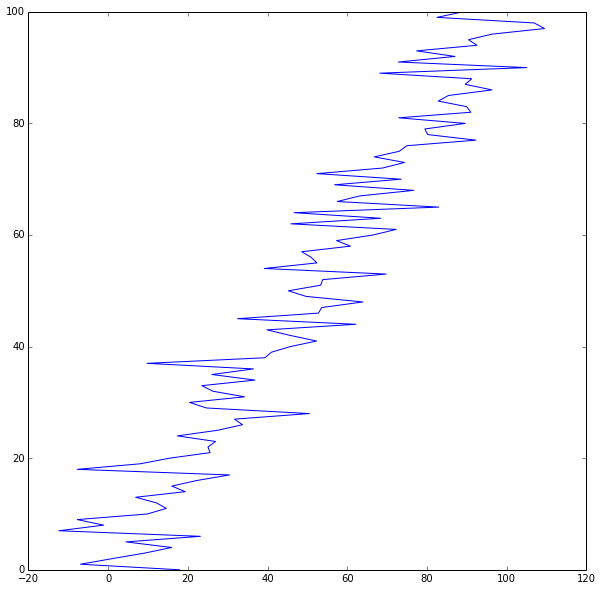

In [164]:
# Add gaussian noise to the signal
pure = np.linspace(0, 100, 101)
noise = np.random.normal(0, 10, 101)
signal = pure + noise
# Show the signal
plot(signal, pure)

In [165]:
# Write the prediction function
def performPrediction(mean_system, sigma_system, noise_system, A):
    mean_system = A*mean_system;
    sigma_system = A*sigma_system*A + noise_system
    return mean_system, sigma_system

In [166]:
# Write the correction function
def performCorrection(measurement, mean_system, sigma_system, noise_system, noise_measurement, C):
    kalman_gain = sigma_system*C*(C*sigma_system*C+noise_measurement)**(-1)
    mean_system += kalman_gain*(measurement - C*mean_system)
    sigma_system = (1 - kalman_gain*C)*sigma_system
    return mean_system, sigma_system

In [167]:
# Gaussian Function
# Not used -- just wanted to check something.
def gaussian(x, mean, sigma):
    return 1/np.power(2*np.pi*sigma, 1/2)*np.exp(-(x-mean)**2/(2*sigma))

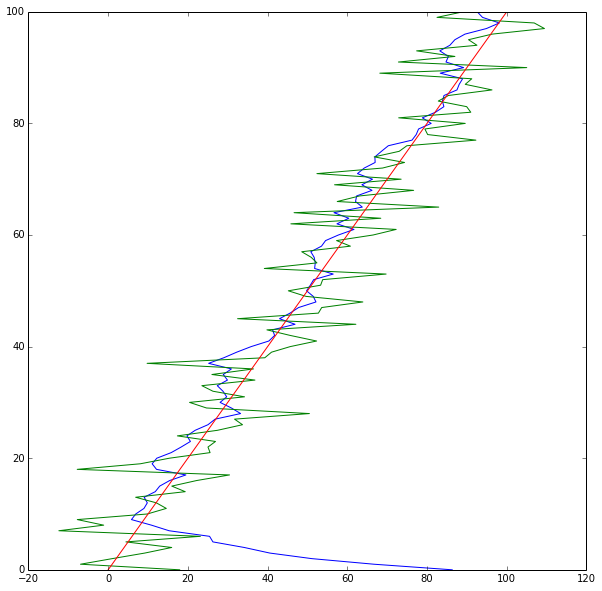

In [168]:
# Initialize the system
# Randomly tuned
# Notice that `noise_system` and `noise_measurement` will make 
# a lot of difference as to how the filter works

# All the predicted states are stacked here
x_predicted = []

# Predicted Initial State
# Intentially gave large values
mean_system = 100
sigma_system = 1

# The A and C matrices
A = 1
C = 1

# Tuning these is very important *****
noise_system = 1
noise_measurement = 10

# Perform State update and Kalman update
for measurement in signal:
    # Perform prediction
    mean_system, sigma_system = performPrediction(mean_system, sigma_system, noise_system, A)
    # Perform correction
    mean_system, sigma_system = performCorrection(measurement, mean_system, sigma_system, noise_system, noise_measurement, C)
    # Append 
    x_predicted.append(mean_system)
    
# Plot the measurements and the predictions
# This is what we measure
plot(x_predicted, pure)
# This is what the Kalman Filter thinks
plot(signal, pure)
# This is what is reality!!
plot(pure, pure)

# Notice the difference below